In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from preprocessing_functions import *

images_pid, images_image, images_label, images_mask = read_images_to_array('data/images/')
images_label_string = convert_labels_to_strings(images_label)

1070.mat
1071.mat
1072.mat
1073.mat
1074.mat
1075.mat
1076.mat
1203.mat
1204.mat
1205.mat
1206.mat
1207.mat
955.mat
956.mat
957.mat


# normalization min-max

In [2]:
min_val = np.min(images_image)
print(min_val)

0


In [3]:
max_val = np.max(images_image)
print(max_val)

12728


In [4]:
images_image = (images_image - min_val) / (max_val - min_val)

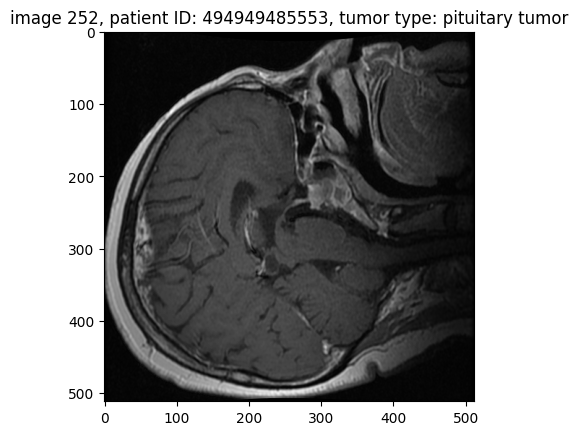

In [5]:
plot_image(252, images_pid, images_image, images_label_string, images_mask,
           show_mask = False)

# train - test split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_image, images_label,
                                                    test_size = 0.20, random_state = 42, shuffle = True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2439, 512, 512) (610, 512, 512) (2439,) (610,)


In [7]:
# X_val = X_train[:610]
# X_train = X_train[610:]
#
# y_val = y_train[:610]
# y_train = y_train[610:]
#
# print(X_val.shape, X_train.shape, y_val.shape, y_train.shape)

In [8]:
X_train = X_train.reshape(X_train.shape[0], 512*512)
X_test = X_test.reshape(X_test.shape[0], 512*512)

In [9]:
X_test.shape

(610, 262144)

# labels to one hot encoding

In [10]:
# from tensorflow.keras.utils import to_categorical
#
# y_train = to_categorical(y_train)
# y_val = to_categorical(y_val)
# y_test = to_categorical(y_test)
#
# print(y_train[:5])
# print(y_train.shape, y_val.shape, y_test.shape)

# SVM model

In [11]:
from sklearn.svm import LinearSVC
svm_model_linear = LinearSVC().fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

accuracy = svm_model_linear.score(X_test, y_test)
print("SVM accuracy: ", accuracy)

C:\Users\ulaba\Documents\PJATK_WUM_projekt\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM accuracy:  0.8311475409836065


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[ 97,  35,   5],
       [ 51, 221,   6],
       [  3,   3, 189]], dtype=int64)

In [16]:
svm_model_linear_weighted = LinearSVC(class_weight={0:708/3049, 1:1426/3049, 2:915/3049}).fit(X_train, y_train)
svm_predictions_weighted = svm_model_linear_weighted.predict(X_test)

accuracy_weighted = svm_model_linear_weighted.score(X_test, y_test)
print("SVM accuracy: ", accuracy_weighted)

C:\Users\ulaba\Documents\PJATK_WUM_projekt\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM accuracy:  0.8426229508196721


In [17]:
cm = confusion_matrix(y_test, svm_predictions_weighted)
cm

array([[101,  31,   5],
       [ 48, 225,   5],
       [  4,   3, 188]], dtype=int64)